<a href="https://colab.research.google.com/github/Jonny-T87/NBA-Trends/blob/main/NBATrends_ML_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NBA Trends Deep Learning Model
A deep learning model that predicts the likelihood a Home Team will win in the NBA Finals.
- Jonny Tesfahun
- 08/11/22

In [33]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score


In [34]:
df = pd.read_csv("/content/drive/MyDrive/DojoBootCamp/Project Files/sorted_teams_clean")
df.head()

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,GAME_month
0,18429,2003-10-07,1610612748,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.143,7.0,44.0,0.0,10
1,18295,2003-10-31,1610612748,2003,81.0,0.357,0.769,0.111,14.0,43.0,93.0,0.435,0.357,15.0,40.0,0.0,10
2,18239,2003-11-08,1610612748,2003,79.0,0.341,0.762,0.438,15.0,40.0,88.0,0.458,0.455,17.0,45.0,1.0,11
3,18211,2003-11-12,1610612748,2003,88.0,0.455,0.765,0.385,21.0,40.0,83.0,0.451,0.250,21.0,42.0,1.0,11
4,18198,2003-11-14,1610612748,2003,105.0,0.409,0.700,0.400,19.0,53.0,101.0,0.448,0.286,16.0,43.0,1.0,11


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25667 entries, 0 to 25666
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25667 non-null  int64  
 1   GAME_DATE_EST   25667 non-null  object 
 2   HOME_TEAM_ID    25667 non-null  int64  
 3   SEASON          25667 non-null  int64  
 4   PTS_home        25667 non-null  float64
 5   FG_PCT_home     25667 non-null  float64
 6   FT_PCT_home     25667 non-null  float64
 7   FG3_PCT_home    25667 non-null  float64
 8   AST_home        25667 non-null  float64
 9   REB_home        25667 non-null  float64
 10  PTS_away        25667 non-null  float64
 11  FG_PCT_away     25667 non-null  float64
 12  FG3_PCT_away    25667 non-null  float64
 13  AST_away        25667 non-null  float64
 14  REB_away        25667 non-null  float64
 15  HOME_TEAM_WINS  25667 non-null  float64
 16  GAME_month      25667 non-null  int64  
dtypes: float64(12), int64(4), objec

##Cleaning data

In [36]:
df.duplicated().sum()

0

In [37]:
df.isna().sum()

Unnamed: 0        0
GAME_DATE_EST     0
HOME_TEAM_ID      0
SEASON            0
PTS_home          0
FG_PCT_home       0
FT_PCT_home       0
FG3_PCT_home      0
AST_home          0
REB_home          0
PTS_away          0
FG_PCT_away       0
FG3_PCT_away      0
AST_away          0
REB_away          0
HOME_TEAM_WINS    0
GAME_month        0
dtype: int64

In [38]:
#changing to dtype
df['SEASON'] = df['SEASON'].astype(float)

In [39]:
#changing to dtype
df['GAME_month'] = df['GAME_month'].astype(float)

##Train Test Split

In [40]:
#setting up train and test data
X = df.drop(columns=['HOME_TEAM_WINS', 'Unnamed: 0', 'GAME_DATE_EST', 'HOME_TEAM_ID'])
y = df['HOME_TEAM_WINS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
X.shape

(25667, 13)

In [42]:
#making scaler 
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [43]:
#transform Xtrain and Xtest
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [44]:
#model shape
input_shape = X.shape[1]
input_shape

13

In [45]:
# Learning history plotting function
#Source Learn platform Week 3
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()


##Model 1: A

In [46]:
#1st model
A_model = Sequential()

In [47]:
# create model architecture
 
A_model.add(Dense(13, input_dim=input_shape, activation='relu'))
A_model.add(Dense(13, activation='relu'))
A_model.add(Dense(1, activation='sigmoid'))

In [48]:
# compile model with metrics
A_model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [49]:
A_history = A_model.fit(X_train_sc, y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=15,
                        verbose=0)

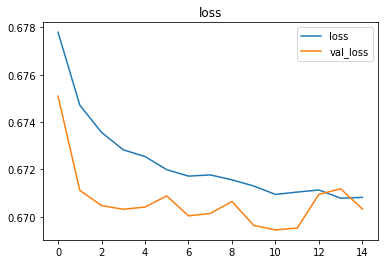

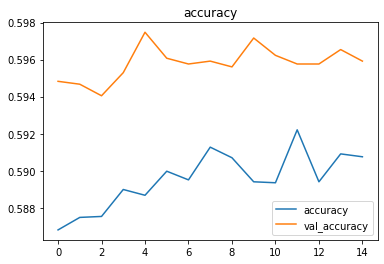

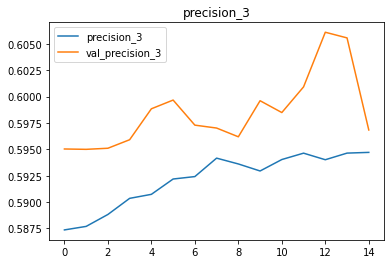

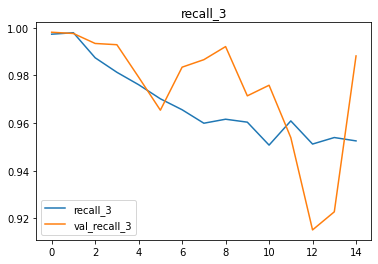

In [50]:
# plot learning history
plot_history(A_history)

In [51]:
# evaluating models
 
y_pred_A = A_model.predict(X_test_sc)  

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_A))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_A)}')
print(f'final R2: {r2_score(y_test, y_pred_A)}')

final RMSE: 0.4886010807225409
final MAE: 0.4718534651065664
final R2: 0.009447685341623324


##Model 2: B

In [52]:
#1st model
B_model = Sequential()

In [53]:
# create model architecture
 
B_model.add(Dense(13, input_dim=input_shape, activation='relu'))
B_model.add(Dense(13, activation='relu'))
B_model.add(Dense(10, activation='relu'))
B_model.add(Dense(5, activation='relu'))
B_model.add(Dense(1, activation='sigmoid'))

In [54]:
# compile model with metrics
B_model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [55]:
B_history = B_model.fit(X_train_sc, y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=15,
                        verbose=0)

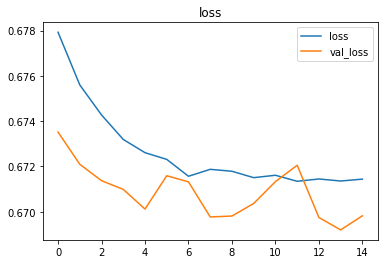

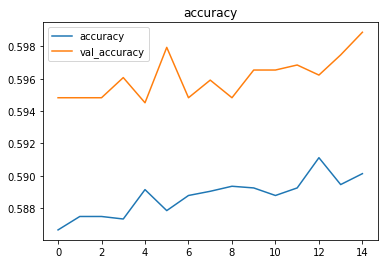

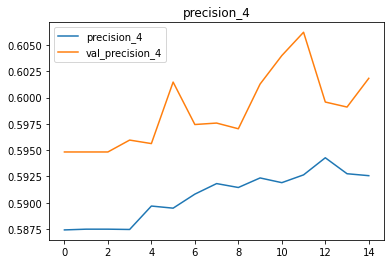

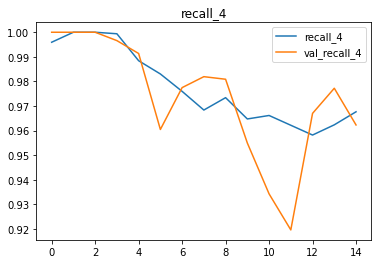

In [56]:
# plot learning history
plot_history(B_history)

In [57]:
# evaluating models
 
y_pred_B = B_model.predict(X_test_sc)  

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_B))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_B)}')
print(f'final R2: {r2_score(y_test, y_pred_B)}')

final RMSE: 0.48836231590164453
final MAE: 0.4792612642537438
final R2: 0.010415555728560788


##Model 3: C

In [58]:
#1st model
C_model = Sequential()

In [59]:
# create model architecture
 
C_model.add(Dense(13, input_dim=input_shape, activation='relu'))
C_model.add(Dense(13, activation='relu'))
C_model.add(Dense(10, activation='relu'))
C_model.add(Dense(5, activation='relu'))
C_model.add(Dense(1, activation='sigmoid'))

In [60]:
# compile model with metrics
C_model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [61]:
##Model C, with early stopping and higher epochs
early_stopping = EarlyStopping(patience=3)

C_history = C_model.fit(X_train_sc, y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=30, callbacks = [early_stopping],
                        verbose=0)

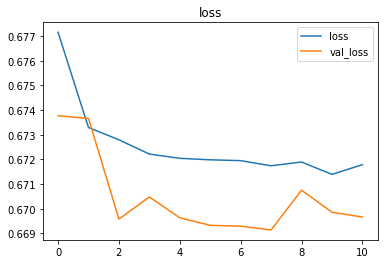

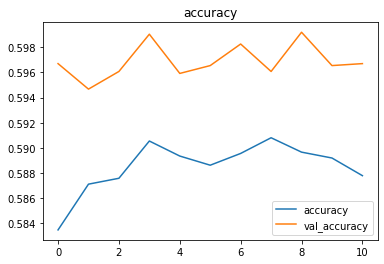

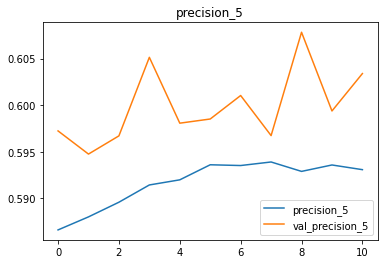

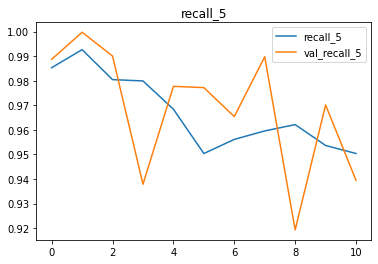

In [62]:
# plot learning history
plot_history(C_history)

In [63]:
# evaluating models
 
y_pred_C = C_model.predict(X_test_sc)  

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_C))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_C)}')
print(f'final R2: {r2_score(y_test, y_pred_C)}')

final RMSE: 0.4882804303326608
final MAE: 0.4800481316278671
final R2: 0.010747382690260654


##Final Model Evaluation:

- Model C:

 - MAE at 0.48 points
 - RMSE at 0.49 points
 - Lowest Val_loss at 67%
 - Highest Accuracy at 59.8%

Based on the metrics and evaluations, it looks like to me that Model C did the best overall performance. Getting lowest MAE, RMSE, and Val_loss while having the highest Accuracy. Although, Model B also did okay.
This deep learning model will help solve the business problem for the NBA betting and gambling businesses. In fact, it will accurately predict close to 60% of the likely win in the NBA Finals for the Home Team. Which is fantastic.
